
# Lab | Feature extraction

#### Based on Lab | Cleaning Categorical Data


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?




In [4]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

sns.set_theme(style="ticks", color_codes=True)



# import sys
# import statistics
import math

In [5]:
data = pd.read_csv('/home/mono/gitHub/Ironweek4/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head(4)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize


In [6]:
data.shape

(9134, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(" ","_"))
data.columns = cols

In [8]:
data.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [9]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')

In [10]:
data['effective_to_date'].dtype

dtype('<M8[ns]')

### Divide categorical and numerical

In [11]:
num = data.select_dtypes(np.number)
num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [12]:
cat = data.select_dtypes(np.object)
cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [13]:
cat.shape

(9134, 15)

In [14]:
cat= cat.drop(columns = ["customer"])

In [15]:
cat.shape

(9134, 14)

#### 3. Plot a correlation matrix, what can you see?


<AxesSubplot:>

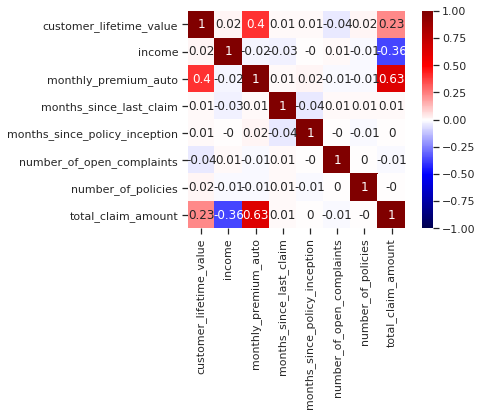

In [14]:
# Check multicollinearity in numerical variables
# There is not higher correlation between the features

sns.heatmap(num.corr().round(2),vmin=-1, vmax=1, center=0, annot = True,square=True,
cmap='seismic')

### 4. Create a function to plot every discrete variables. 
Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
### 5. What can you see in the plots?

In [15]:
cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [16]:
cat.shape

(9134, 14)

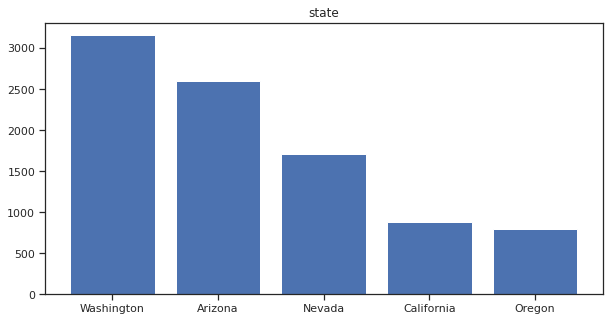

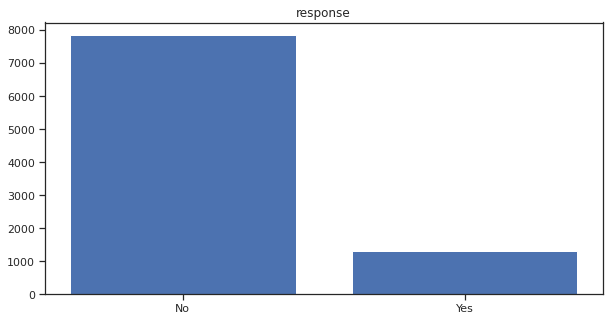

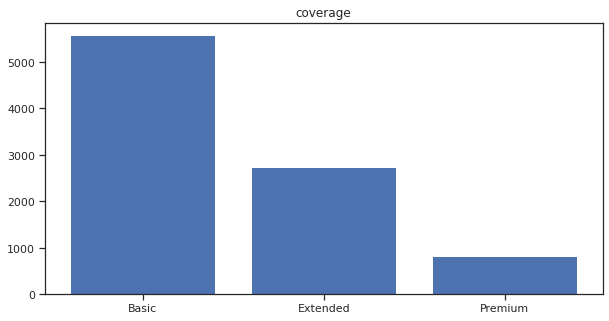

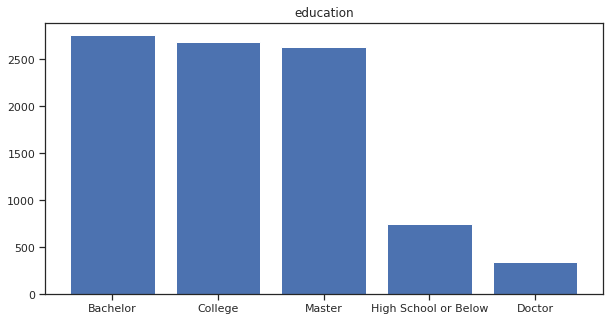

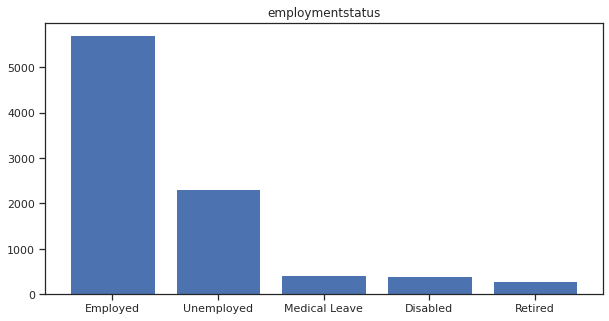

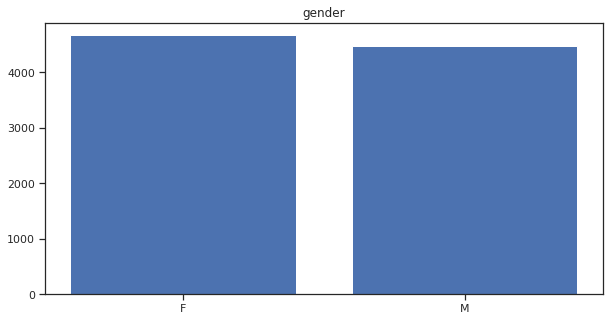

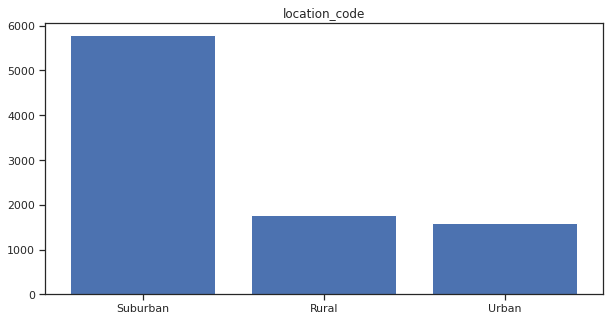

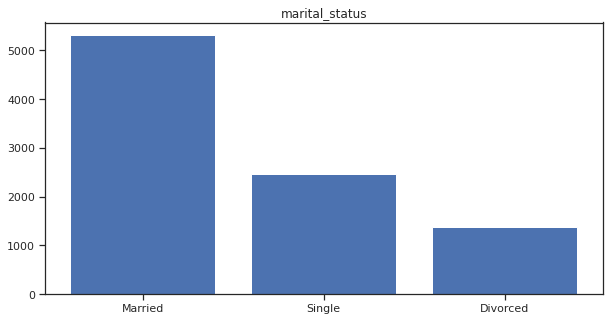

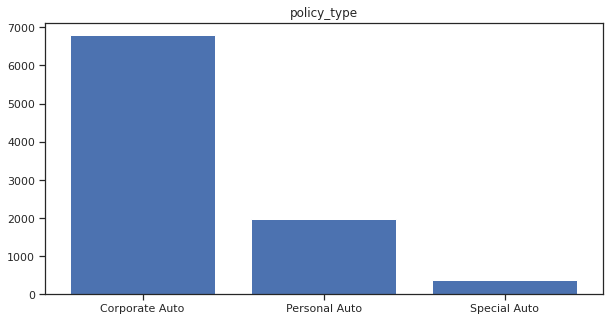

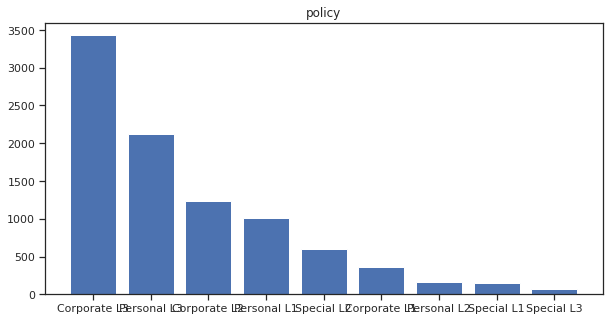

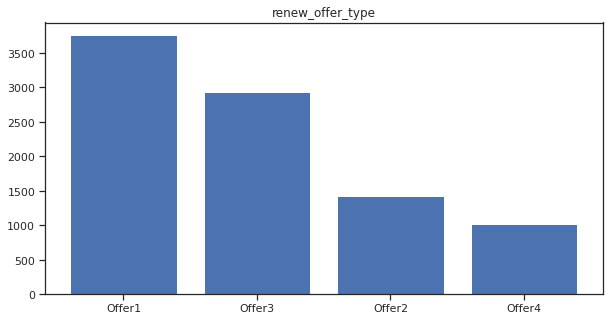

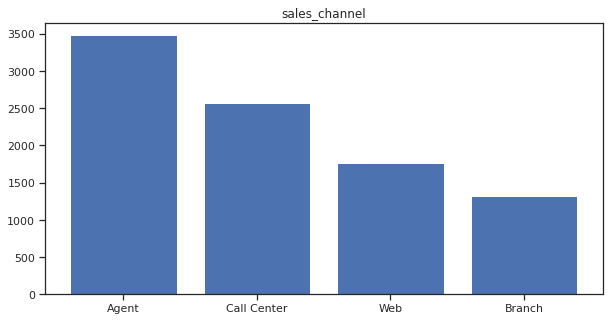

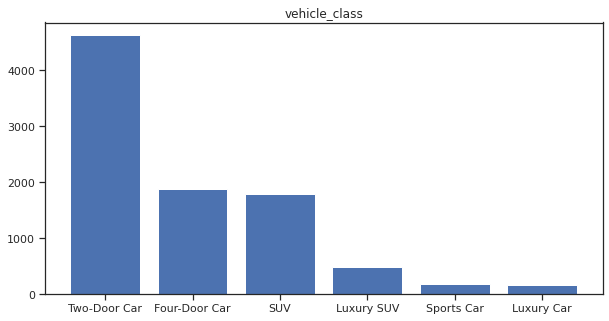

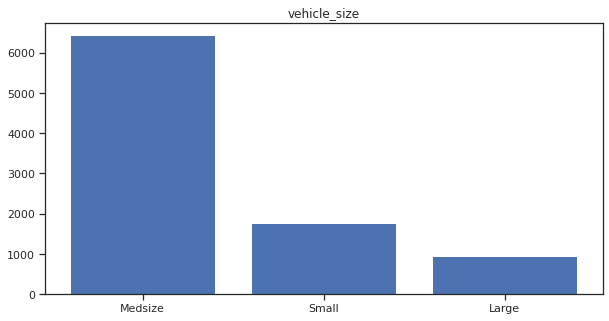

In [19]:
#import matplotlib.pyplot as plt                 # visualization library
#%matplotlib inline

for c in cat:
    plt.figure(figsize=(10,5))
    plt.bar(data[c].unique(), data[c].value_counts())
    plt.title(c)
    plt.show()
    
    
    
 # other simple option   
#for i in range(cat.shape[1]):
 #   sns.histplot(cat[cat.columns[i]], bins=50)
  #  plt.show()

### 6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

In [22]:
num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

<AxesSubplot:ylabel='total_claim_amount'>

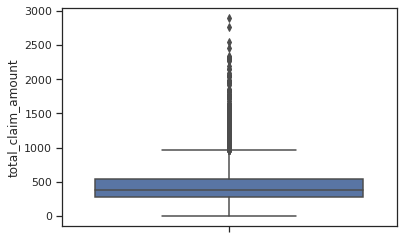

In [26]:
sns.boxplot(y="total_claim_amount", data=num)
#plt.show()

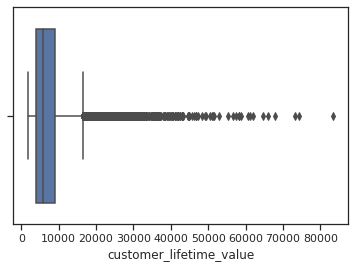

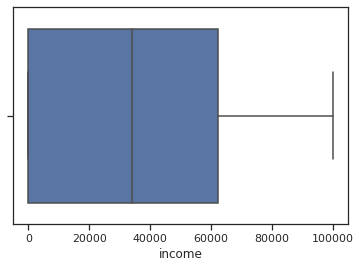

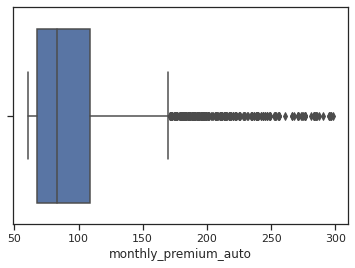

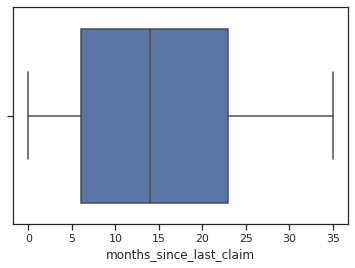

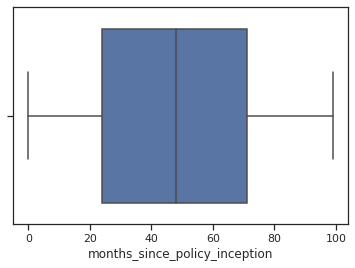

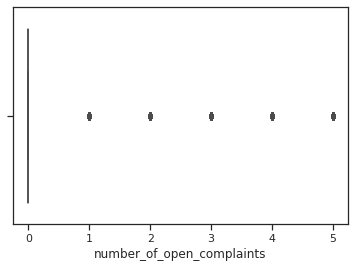

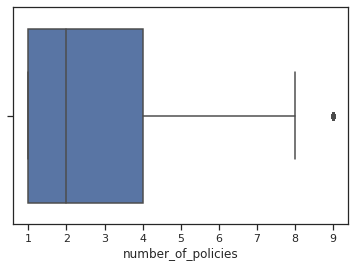

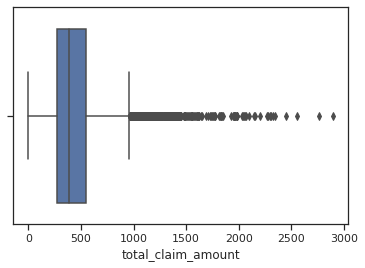

In [33]:
# sns.boxplot(y=numericals['income'], data=numericals)

for i in range(num.shape[1]):
    sns.boxplot(num[num.columns[i]])
    plt.show()

### 7. Have you found outliers? If you have, what should we do with them?

* customer_lifetime_value
* total_claim_amount
    * Log_Transformation 
    * boxcox trasformation

### 8. Check nan values per column.
* There are not nan vaules.

In [29]:
#data.isna().sum()     # missing values
# data.isna().sum()/data.shape[0]*100
pd.DataFrame(round(num.isna().sum()/len(num),4)*100)

,0
customer_lifetime_value,0.0
income,0.0
monthly_premium_auto,0.0
months_since_last_claim,0.0
months_since_policy_inception,0.0
number_of_open_complaints,0.0
number_of_policies,0.0
total_claim_amount,0.0


In [30]:

pd.DataFrame(round(cat.isna().sum()/len(cat),4)*100)

,0
state,0.0
response,0.0
coverage,0.0
education,0.0
employmentstatus,0.0
gender,0.0
location_code,0.0
marital_status,0.0
policy_type,0.0
policy,0.0


### 9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [31]:
def cont_disc(arg):
    uniquevalues = len(arg.unique())
    if uniquevalues > 100:
        x = ['continuous',arg.name]
        return x
    else:
        x = ['discrete',arg.name]
        return x

In [32]:
# How to improve this function!!

lst = []
for i in range(num.shape[1]):
    print(cont_disc(num[num.columns[i]]))

['continuous', 'customer_lifetime_value']
['continuous', 'income']
['continuous', 'monthly_premium_auto']
['discrete', 'months_since_last_claim']
['discrete', 'months_since_policy_inception']
['discrete', 'number_of_open_complaints']
['discrete', 'number_of_policies']
['continuous', 'total_claim_amount']


In [16]:
num_new = num[["customer_lifetime_value", "income", "monthly_premium_auto", "total_claim_amount"]]


In [17]:
num_new.head(2)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935


In [18]:
num_df = pd.concat([num, num_new], axis = 1)
# pd.concat([one,two],axis=1)

In [19]:
num_df.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147,2763.519279,56274,69,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935,6979.535903,0,94,1131.464935


In [20]:
cat_to_add = num [["months_since_last_claim", "months_since_policy_inception", "number_of_open_complaints", "number_of_policies"]] 

In [21]:
cat_to_add.head(2)

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8


In [22]:
cat_df = pd.concat([cat, cat_to_add], axis = 1)

In [23]:
cat_df.head(2)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,5,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,42,0,8


### 10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
* nope, the features are cleaned.

In [24]:
# check for unique values -- code from Himanshu

print('Categorical Features:', len(cat_df))
print('----------')
for c in cat_df:
    print('Name: {}'.format(data[c].name))    # column name
    print('Type: {}'.format(data[c].dtype))   # column type
    print('Unique values: {}'.format(len(data[c].unique())))   # column unique values
    print(data[c].unique())
    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage
    print('\n----------')

Categorical Features: 9134
----------
Name: state
Type: object
Unique values: 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

----------
Name: response
Type: object
Unique values: 2
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: response, dtype: float64

----------
Name: coverage
Type: object
Unique values: 3
['Basic' 'Extended' 'Premium']
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64

----------
Name: education
Type: object
Unique values: 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64

----------
Name: employmentstatus
Type: object
Unique values: 5
['Emplo

### 11. Get categorical features.

In [25]:
cat_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,5,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,42,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,18,38,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,18,65,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,12,44,0,1


In [26]:
num_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147,2763.519279,56274,69,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247,12887.431650,48767,108,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344,7645.861827,0,106,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879,2813.692575,43836,73,138.130879


### 12.  What should we do with the customer id column?
* allready dropped!

#### LAB 4.2  Finished -----------------------------------------

### Lab | Feature extraction

### 1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

### 2. Plot all the categorical variables with the proper plot. What can you see?


In [27]:
cat_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,5,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,42,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,18,38,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,18,65,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,12,44,0,1


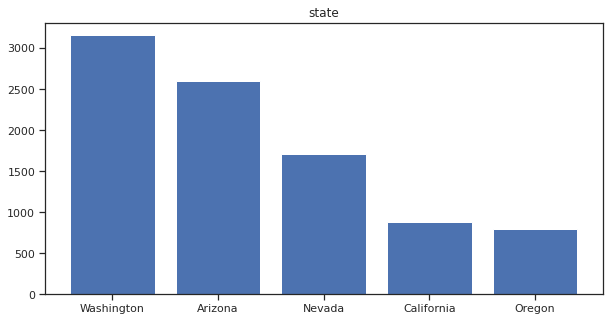

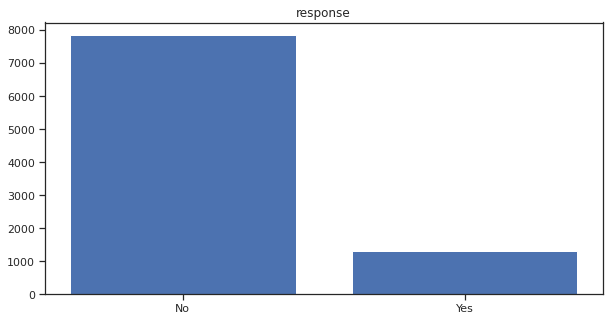

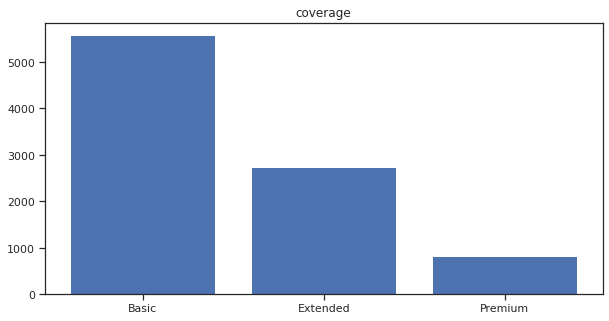

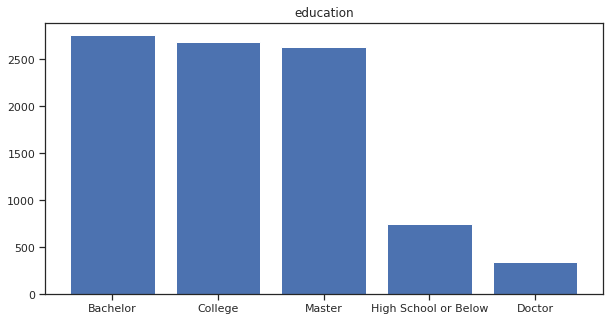

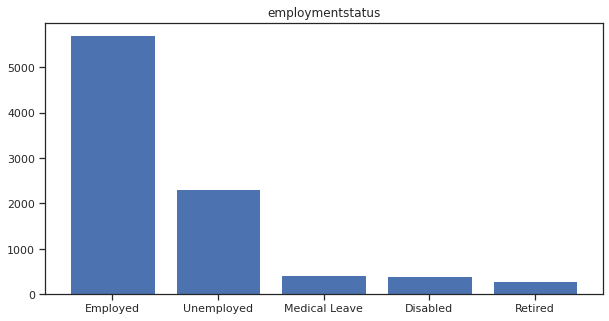

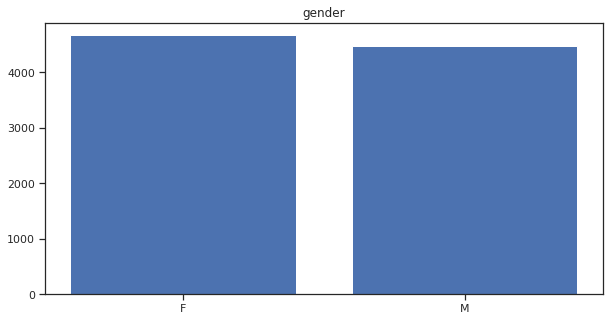

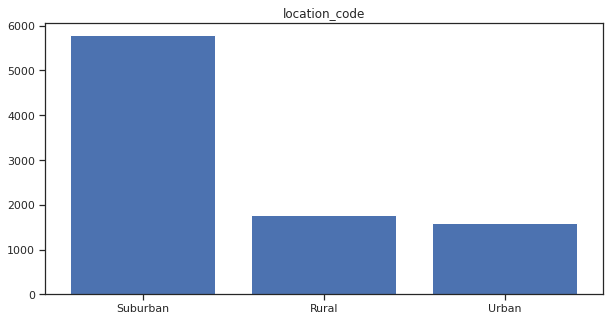

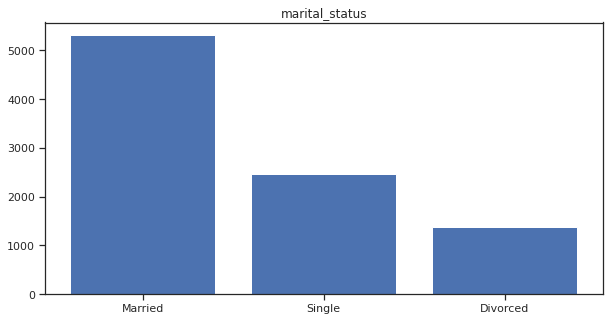

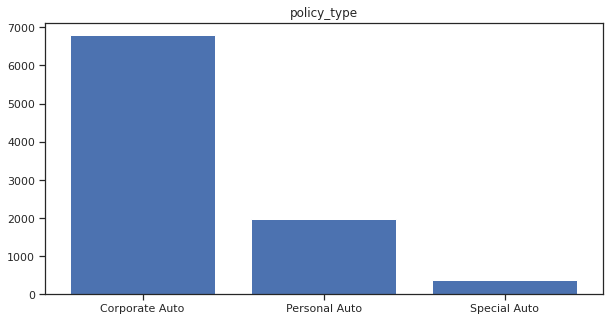

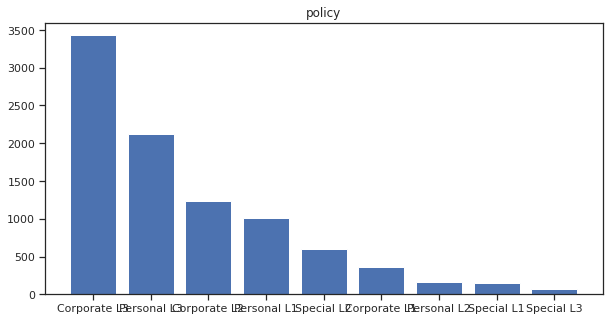

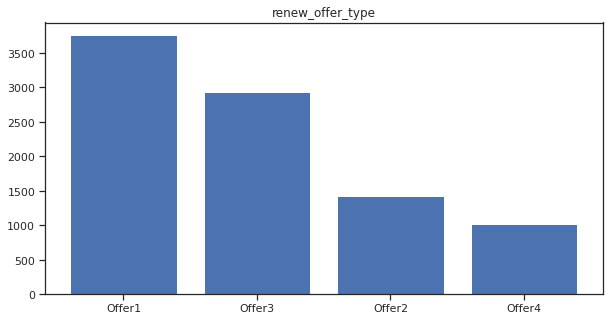

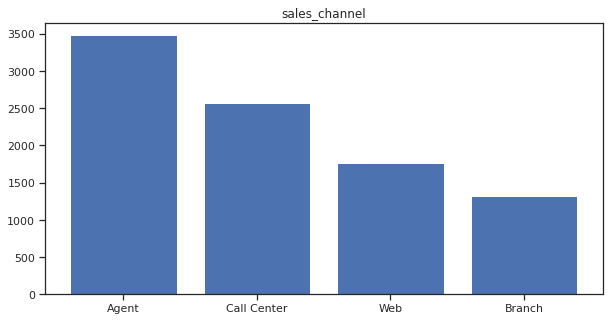

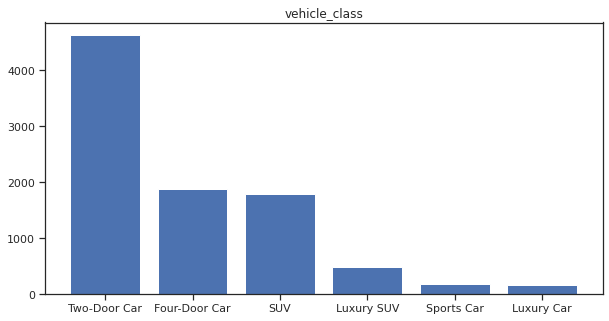

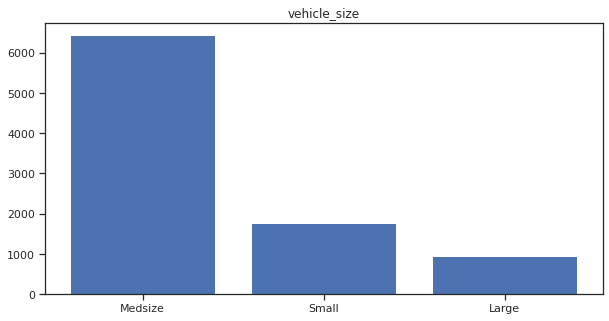

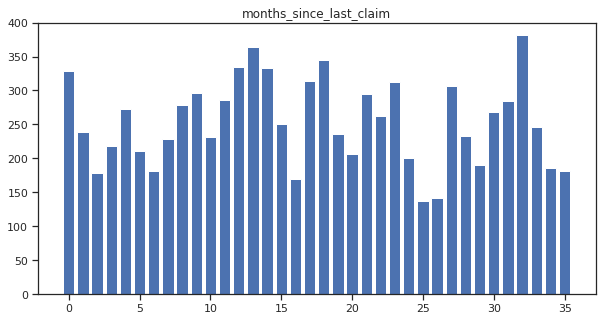

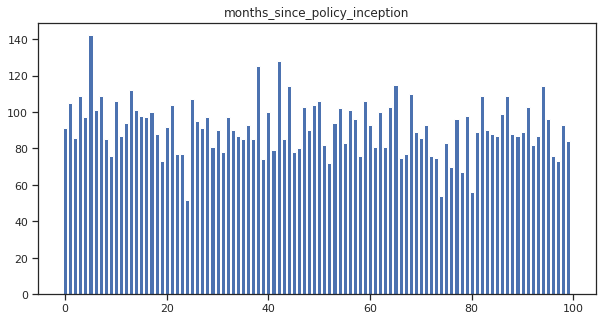

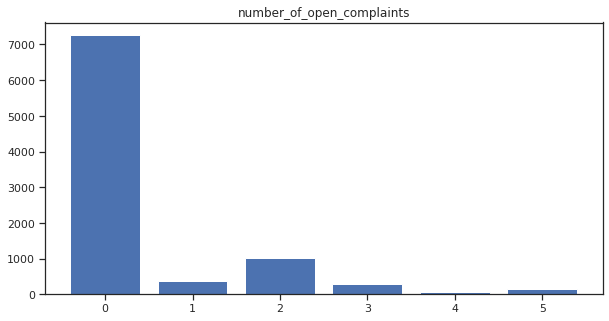

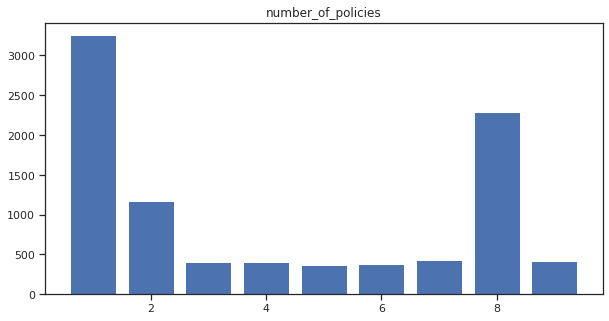

In [28]:
for c in cat_df:
    plt.figure(figsize=(10,5))
    plt.bar(data[c].unique(), data[c].value_counts())
    plt.title(c)
    plt.show()

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

#####  we can drop:
* **gender** 

##### we can group values in: 
* **policy, vehicle_class, months_since_last_claim, months_since_policy_inception, number_of_open_complaints, number_of_policies**


In [29]:
# check for unique values -- code from Himanshu

print('Categorical Features:', len(cat_df))
print('----------')
for c in cat_df:
    print('Name: {}'.format(data[c].name))    # column name
    print('Type: {}'.format(data[c].dtype))   # column type
    print('Unique values: {}'.format(len(data[c].unique())))   # column unique values
    print(data[c].unique())
    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage
    print('\n----------')

Categorical Features: 9134
----------
Name: state
Type: object
Unique values: 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

----------
Name: response
Type: object
Unique values: 2
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: response, dtype: float64

----------
Name: coverage
Type: object
Unique values: 3
['Basic' 'Extended' 'Premium']
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64

----------
Name: education
Type: object
Unique values: 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64

----------
Name: employmentstatus
Type: object
Unique values: 5
['Emplo

### 4. Plot time variable. Can you extract something from it?
* **months_since_last_claim** can be grouped in 4 - categories5
* **months_since_policy_inception** is to homogeneous, we cam dropped it 

In [30]:
 cat_time = cat_df[["months_since_last_claim", "months_since_policy_inception"]]

In [31]:
cat_time.shape


(9134, 2)

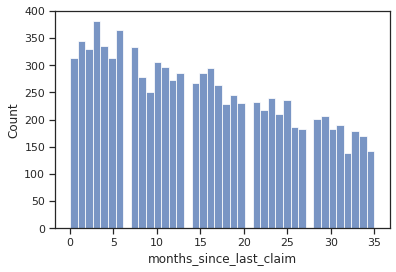

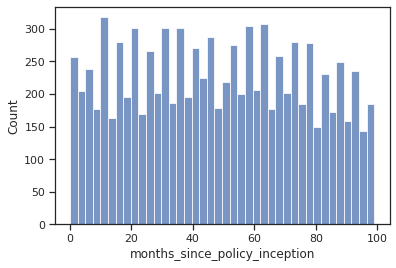

In [34]:
for i in range(cat_time.shape[1]):
    sns.histplot(cat_time[cat_time.columns[i]], bins=40)
    plt.show()

### Finished -------------------------------